In [2]:
import requests 
response = requests.get("https://services3.arcgis.com/Jdnp1TjADvSDxMAX/ArcGIS/rest/services/dnrFisheries/FeatureServer/13/query?outFields=*&where=1%3D1&f=geojson")

In [3]:
data = response.json()


In [1]:
import pandas as pd 
pd.options.display.float_format = '{:.2f}'.format
import matplotlib.pyplot as plt
import random
from itertools import cycle, islice
import matplotlib.colors as mcolors
pd.set_option('display.max_rows', None)

In [2]:

stock_path = "Fish_Stocking_Data.csv"
stock = pd.read_csv(stock_path)
stock.head()

,County,Water Body,Site Name,Town,Range,Section,Species,Strain,Date,Number,Avg. Length
0,Alcona,Alcona Dam Pond COUNTY PARK (25N 05E 11),COUNTY PARK,25N,05E,11.00,Walleye,Muskegon,2013,29306,2.10
1,Alcona,Alcona Dam Pond COUNTY PARK (25N 05E 11),COUNTY PARK,25N,05E,11.00,Walleye,Muskegon,2015,27537,1.50
2,Alcona,Au Sable River - Mio to Alcona reach FR4842-Al...,FR4842-Alcona Rest,26N,05E,19.00,Brown trout,Sturgeon River,2016,6000,4.58
3,Alcona,Au Sable River - Mio to Alcona reach FR4842-Al...,FR4842-Alcona Rest,26N,05E,19.00,Brown trout,Sturgeon River,2017,6000,4.87
4,Alcona,Au Sable River - Mio to Alcona reach FR4842-Al...,FR4842-Alcona Rest,26N,05E,19.00,Brown trout,Sturgeon River,2018,6000,5.24


In [3]:
creel_path = "Michigan_Creel_Data_Harvest1.csv"
creel = pd.read_csv(creel_path)
creel.head()


,OBJECTID,PK,Mode,Site,Year,Month,Species,Effort,AnglerTrips,Harvest,Catch,County,Lake,Port
0,10021,665475,BOAT,1,2012,3,ATL,1823.25,405.17,0.00,0.00,MENOMINEE,MI,MENOMINEE
1,10022,665476,BOAT,1,2012,4,ATL,5103.00,1173.33,0.00,0.00,MENOMINEE,MI,MENOMINEE
2,10023,665477,BOAT,1,2012,5,ATL,1693.78,386.73,0.00,0.00,MENOMINEE,MI,MENOMINEE
3,10024,665478,BOAT,1,2012,6,ATL,4304.25,810.84,0.00,0.00,MENOMINEE,MI,MENOMINEE
4,10025,665479,BOAT,1,2012,7,ATL,15058.44,1679.65,0.00,0.00,MENOMINEE,MI,MENOMINEE


In [10]:
#walchipmean = creel.loc[(creel["Species"] == "WAE") & 
                        #(creel['County'] == "CHIPPEWA")].groupby('Year').mean()
wal_chip_total = creel.loc[(creel["Species"] == "WAE") & 
                           (creel["County"]== "CHIPPEWA")].groupby('Year').sum()
wal_chip_mean = creel.loc[(creel["Species"] == "WAE") & 
                          (creel["County"]== "CHIPPEWA")].groupby('Year').mean()
wal_chip_median = creel.loc[(creel["Species"] == "WAE") & 
                            (creel["County"]== "CHIPPEWA")].groupby('Year').median()
wal_chip_sd = creel.loc[(creel["Species"] == "WAE") & 
                        (creel["County"]== "CHIPPEWA")].groupby('Year').std()
wal_chip_sem = creel.loc[(creel["Species"] == "WAE") & 
                         (creel["County"]== "CHIPPEWA")].groupby('Year').sem()

walchiptot = wal_chip_total['Catch']
walchipm = wal_chip_mean['Catch']
walchipmed = wal_chip_median['Catch']
walchipsd = wal_chip_sd['Catch']
walchipsem = wal_chip_sem['Catch']
wal_chip_df = pd.DataFrame({'Total Walleye Caught':walchiptot,
                            'Mean Walleye Caught':walchipm, 
                            'Median Walleye Caught':walchipmed, 
                            'Walleye Caught St. Dev.':walchipsd, 
                            "Walleye Caught St. Err.":walchipsem})
wal_chip_df

C:\Users\Kyle\AppData\Local\Temp\ipykernel_18156\1285893771.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  (creel["County"]== "CHIPPEWA")].groupby('Year').sum()
C:\Users\Kyle\AppData\Local\Temp\ipykernel_18156\1285893771.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  (creel["County"]== "CHIPPEWA")].groupby('Year').mean()
C:\Users\Kyle\AppData\Local\Temp\ipykernel_18156\1285893771.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be v

,Total Walleye Caught,Mean Walleye Caught,Median Walleye Caught,Walleye Caught St. Dev.,Walleye Caught St. Err.
Year,,,,,
2012,27032.91,1001.22,0.00,2227.83,428.75
2013,41827.89,972.74,0.00,2435.86,371.47
2014,28776.81,872.02,133.47,2436.70,424.17
2015,27214.00,1088.56,11.00,1865.50,373.10
2016,16935.00,677.40,0.00,1808.10,361.62
2017,41871.00,721.91,12.00,2003.10,263.02
2018,13.43,1.92,0.00,5.08,1.92
2019,41.00,6.83,1.50,11.41,4.66
2020,29.09,2.42,0.00,4.36,1.26


In [11]:
rain_chip_total = creel.loc[(creel["Species"] == "RBT") & 
                           (creel["County"]== "CHIPPEWA")].groupby('Year').sum()
rain_chip_mean = creel.loc[(creel["Species"] == "RBT") & 
                          (creel["County"]== "CHIPPEWA")].groupby('Year').mean()
rain_chip_median = creel.loc[(creel["Species"] == "RBT") & 
                            (creel["County"]== "CHIPPEWA")].groupby('Year').median()
rain_chip_sd = creel.loc[(creel["Species"] == "RBT") & 
                        (creel["County"]== "CHIPPEWA")].groupby('Year').std()
rain_chip_sem = creel.loc[(creel["Species"] == "RBT") & 
                         (creel["County"]== "CHIPPEWA")].groupby('Year').sem()

rainchiptot = rain_chip_total['Catch']
rainchipm = rain_chip_mean['Catch']
rainchipmed = rain_chip_median['Catch']
rainchipsd = rain_chip_sd['Catch']
rainchipsem = rain_chip_sem['Catch']
rain_chip_df = pd.DataFrame({'Total Trout Caught':rainchiptot,
                            'Mean Trout Caught':rainchipm, 
                            'Median Trout Caught':rainchipmed, 
                            'Trout Caught St. Dev.':rainchipsd, 
                            "Trout Caught St. Err.":rainchipsem})
rain_chip_df

C:\Users\Kyle\AppData\Local\Temp\ipykernel_18156\4034222039.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  (creel["County"]== "CHIPPEWA")].groupby('Year').sum()
C:\Users\Kyle\AppData\Local\Temp\ipykernel_18156\4034222039.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  (creel["County"]== "CHIPPEWA")].groupby('Year').mean()
C:\Users\Kyle\AppData\Local\Temp\ipykernel_18156\4034222039.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be v

,Total Trout Caught,Mean Trout Caught,Median Trout Caught,Trout Caught St. Dev.,Trout Caught St. Err.
Year,,,,,
2012,46.22,1.71,0.00,6.37,1.23
2013,77.30,1.80,0.00,5.54,0.84
2014,528.71,16.02,0.00,39.86,6.94
2015,18.00,0.72,0.00,2.56,0.51
2016,109.00,4.36,0.00,9.96,1.99
2017,4482.00,77.28,0.00,307.05,40.32
2018,46.63,6.66,0.00,9.53,3.60
2019,77.00,12.83,0.00,22.17,9.05
2020,90.35,7.53,0.00,15.97,4.61


In [12]:
rbtbay_mean = creel.loc[(creel['Species'] == 'RBT') & (creel['County'] == 'OTTAWA')].groupby('Year').mean(numeric_only=True)
rbtbay_med = creel.loc[(creel['Species'] == 'RBT') & (creel['County'] == 'OTTAWA')].groupby('Year').median(numeric_only=True)
rbtbay_std = creel.loc[(creel['Species'] == 'RBT') & (creel['County'] == 'OTTAWA')].groupby('Year').std(numeric_only=True)
rbtbay_sem = creel.loc[(creel['Species'] == 'RBT') & (creel['County'] == 'OTTAWA')].groupby('Year').sem(numeric_only=True)
rbtbay_sum = creel.loc[(creel['Species'] == 'RBT') & (creel['County'] == 'OTTAWA')].groupby('Year').sum(numeric_only=True)

rbtbaymean = rbtbay_mean['Catch']
rbtbaymed = rbtbay_med['Catch']
rbtbaystd = rbtbay_std['Catch']
rbtbaysem = rbtbay_sem['Catch']
rbtbaysum = rbtbay_sum['Catch']

rbt_df = pd.DataFrame({'Total Trout Caught':rbtbaysum,'Mean Trout Caught':rbtbaymean, 'Median Trout Caught':rbtbaymed,
                       'Trout Catch St. Dev.':rbtbaystd, "Trout Catch St. Err.":rbtbaysem})
rbt_df

,Total Trout Caught,Mean Trout Caught,Median Trout Caught,Trout Catch St. Dev.,Trout Catch St. Err.
Year,,,,,
2012,8519.03,473.28,102.93,770.16,181.53
2013,3479.69,231.98,112.98,268.19,69.25
2014,5688.23,379.22,14.23,694.74,179.38
2015,2019.00,126.19,64.50,170.45,42.61
2016,4464.00,297.60,56.00,528.08,136.35
2017,1793.00,112.06,22.00,183.08,45.77
2018,2000.37,142.88,49.92,173.64,46.41
2019,1107.00,69.19,5.50,115.95,28.99
2020,1104.32,55.22,13.61,83.91,18.76


In [13]:
waebay_mean = creel.loc[(creel['Species'] == 'WAE') & (creel['County'] == 'OTTAWA')].groupby('Year').mean(numeric_only=True)
waebay_med = creel.loc[(creel['Species'] == 'WAE') & (creel['County'] == 'OTTAWA')].groupby('Year').median(numeric_only=True)
waebay_sd = creel.loc[(creel['Species'] == 'WAE') & (creel['County'] == 'OTTAWA')].groupby('Year').std(numeric_only=True)
waebay_sem = creel.loc[(creel['Species'] == 'WAE') & (creel['County'] == 'OTTAWA')].groupby('Year').sem(numeric_only=True)
waebay_sum = creel.loc[(creel['Species'] == 'WAE') & (creel['County'] == 'OTTAWA')].groupby('Year').sum(numeric_only=True)



waebaymean = waebay_mean['Catch']
waebaymed = waebay_med['Catch']
waebaysum = waebay_sum['Catch']
waebaysd = waebay_sd['Catch']
waebaysem = waebay_sem['Catch']

wae_df = pd.DataFrame({'Total Walleye Caught':waebaysum,'Mean Walleye Caught':waebaymean, 'Median Walleye Caught':waebaymed,
                       'Walleye Catch St. Dev.':waebaysd, "Walleye Catch St. Err.":waebaysem})
wae_df


,Total Walleye Caught,Mean Walleye Caught,Median Walleye Caught,Walleye Catch St. Dev.,Walleye Catch St. Err.
Year,,,,,
2012,24.60,1.37,0.00,5.80,1.37
2013,0.00,0.00,0.00,0.00,0.00
2014,0.00,0.00,0.00,0.00,0.00
2015,39.00,2.44,0.00,6.48,1.62
2016,18.00,1.20,0.00,3.36,0.87
2017,78.00,4.88,0.00,15.72,3.93
2018,0.00,0.00,0.00,0.00,0.00
2019,48.00,3.00,0.00,6.18,1.54
2020,0.00,0.00,0.00,0.00,0.00


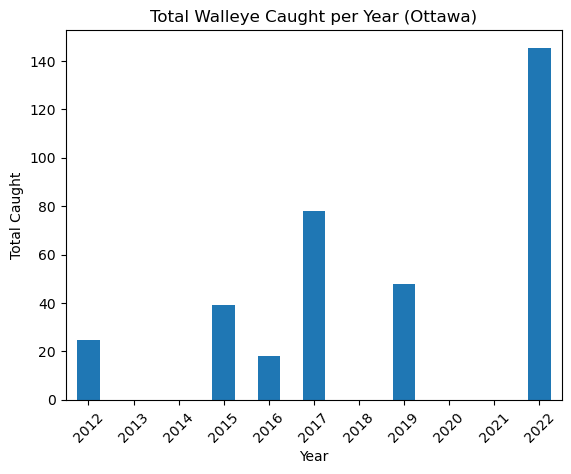

In [59]:
waebaysum.plot.bar()
plt.xlabel('Year')
plt.ylabel('Total Caught')
plt.title('Total Walleye Caught per Year (Ottawa)')
plt.xticks(rotation=45)

plt.savefig('WTO.png')

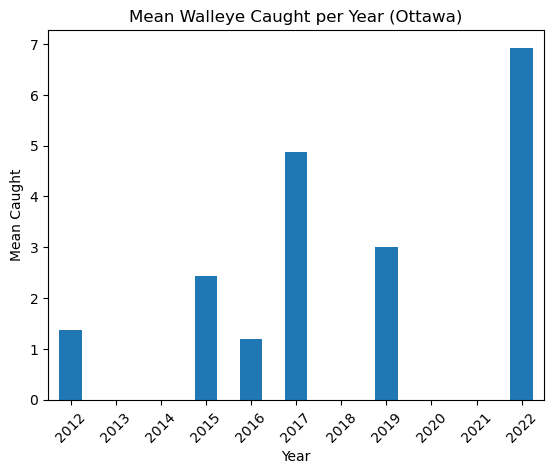

In [60]:
waebaymean.plot.bar()
plt.xlabel('Year')
plt.ylabel('Mean Caught')
plt.title('Mean Walleye Caught per Year (Ottawa)')

plt.xticks(rotation=45)
plt.savefig('WMO.png')
plt.show()

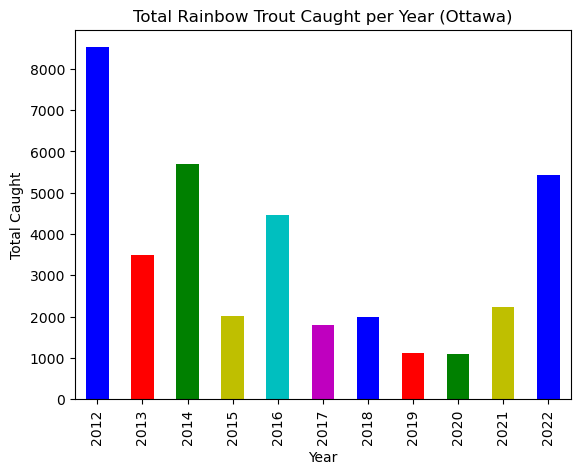

In [61]:

plt.xlabel('Year')
plt.ylabel('Total Caught')
plt.title('Total Rainbow Trout Caught per Year (Ottawa)')
plt.xticks(rotation=45)
my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'c', 'm']), None, len(rainchipm)))
rbtbaysum.plot.bar(color = my_colors)
plt.savefig('TTO.png')
plt.show()

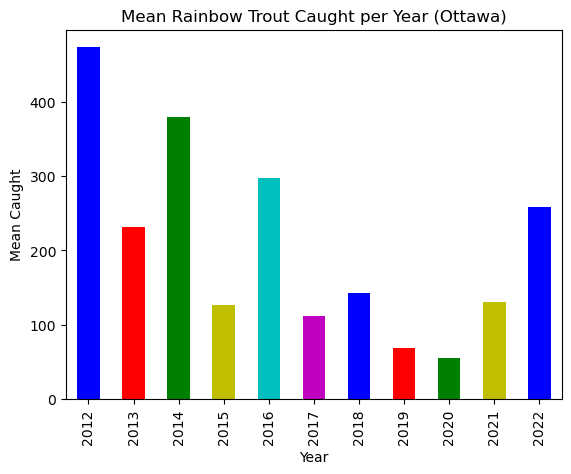

In [62]:
plt.xlabel('Year')
plt.ylabel('Mean Caught')
plt.title('Mean Rainbow Trout Caught per Year (Ottawa)')
plt.xticks(rotation=45)
my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'c', 'm']), None, len(rainchipm)))
rbtbaymean.plot.bar(color = my_colors)
plt.savefig('TMO.png')
plt.show()

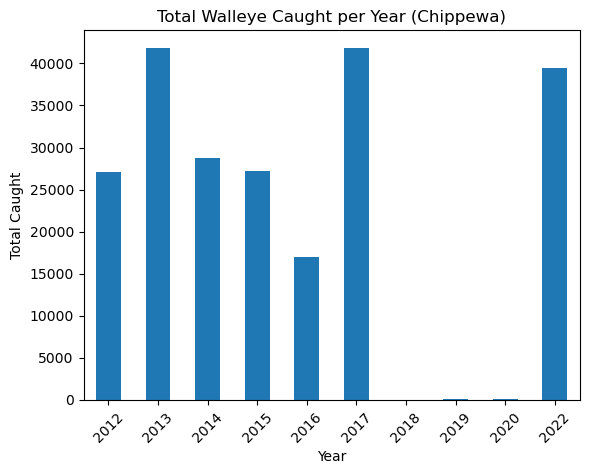

In [63]:
walchiptot.plot.bar()
plt.xlabel('Year')
plt.ylabel('Total Caught')
plt.title('Total Walleye Caught per Year (Chippewa)')
plt.xticks(rotation=45)
plt.savefig('WTC.png')
plt.show()

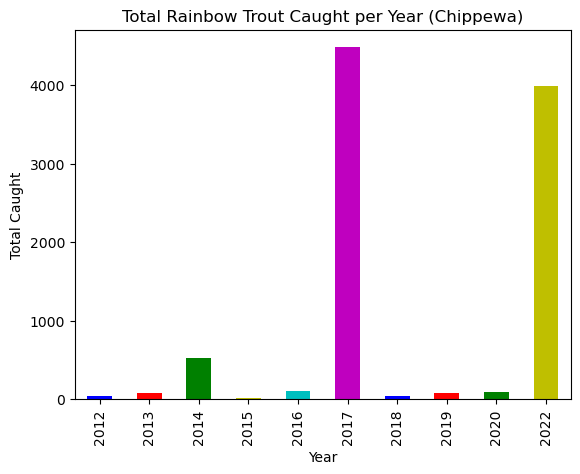

In [64]:
rainchiptot.plot.bar()
plt.xlabel('Year')
plt.ylabel('Total Caught')
plt.title('Total Rainbow Trout Caught per Year (Chippewa)')
plt.xticks(rotation=45)
my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'c', 'm']), None, len(rainchipm)))
rainchiptot.plot.bar(color = my_colors)
plt.savefig('TTC.png')

plt.show()

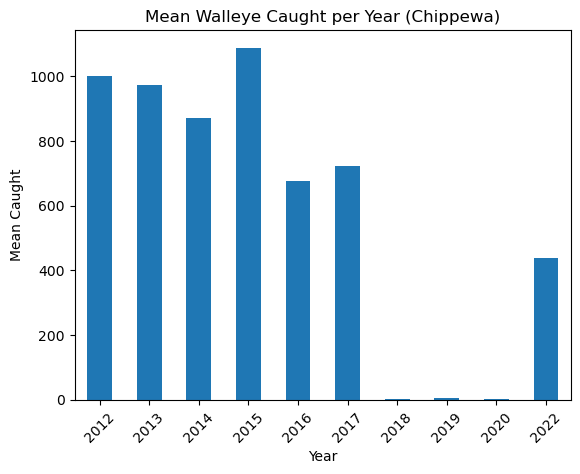

In [65]:
walchipm.plot.bar()
plt.xlabel('Year')
plt.ylabel('Mean Caught')
plt.title('Mean Walleye Caught per Year (Chippewa)')

plt.xticks(rotation=45)
plt.savefig('WMC.png')
plt.show()

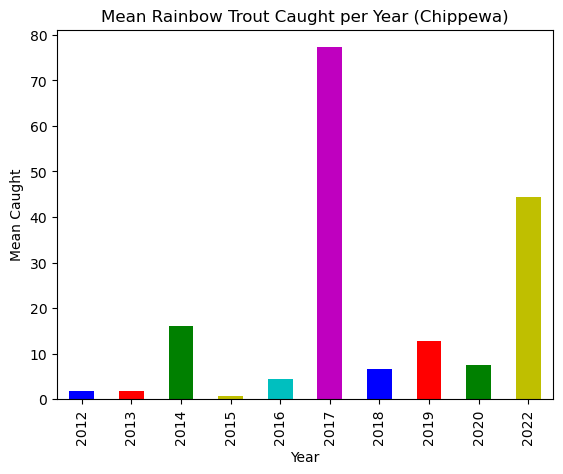

In [66]:

plt.xlabel('Year')
plt.ylabel('Mean Caught')
plt.title('Mean Rainbow Trout Caught per Year (Chippewa)')
plt.xticks(rotation=45)
my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'c', 'm']), None, len(rainchipm)))
rainchipm.plot.bar(color = my_colors)
plt.savefig('TMC.png')
plt.show()

In [52]:
wal_total = stock.loc[(stock["Species"] == "Walleye") & (stock["County"]== "Chippewa")].groupby('Date').sum()
trout_total = stock.loc[(stock["Species"] == "Rainbow trout") & (stock['County']== 'Chippewa')].groupby('Date').sum()
wal_total['Catch'] = walchiptot
trout_total['Catch'] = rainchiptot
wal_total.fillna(0,inplace=True)
wal_total1 = wal_total.loc[:,['Catch','Number']]
trout_total.fillna(0,inplace=True)
trout_total1= trout_total.loc[:,['Catch','Number']]
trout_total1 = trout_total1.rename(columns={'Number': 'Stock'})
wal_total1 = wal_total1.rename(columns={'Number': 'Stock'})

trout_total1

C:\Users\Kyle\AppData\Local\Temp\ipykernel_18156\3058868740.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  wal_total = stock.loc[(stock["Species"] == "Walleye") & (stock["County"]== "Chippewa")].groupby('Date').sum()
C:\Users\Kyle\AppData\Local\Temp\ipykernel_18156\3058868740.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  trout_total = stock.loc[(stock["Species"] == "Rainbow trout") & (stock['County']== 'Chippewa')].groupby('Date').sum()


,Catch,Stock
Date,,
2012,46.22,25249
2013,77.30,23632
2014,528.71,26069
2015,18.00,26871
2016,109.00,26740
2017,4482.00,23768
2018,46.63,27240
2019,77.00,24754
2020,90.35,31199


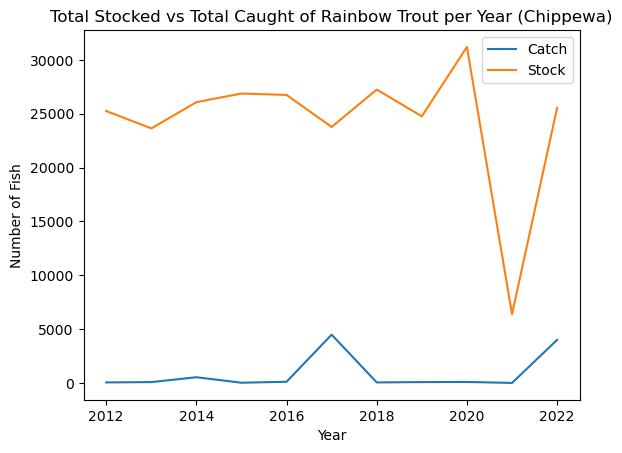

In [67]:
trout_total1.plot.line()
plt.xlabel('Year')
plt.ylabel('Number of Fish')
plt.title('Total Stocked vs Total Caught of Rainbow Trout per Year (Chippewa)')
plt.savefig('TCC.png')
plt.show()

C:\Users\Kyle\AppData\Local\Temp\ipykernel_18156\3560195737.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])


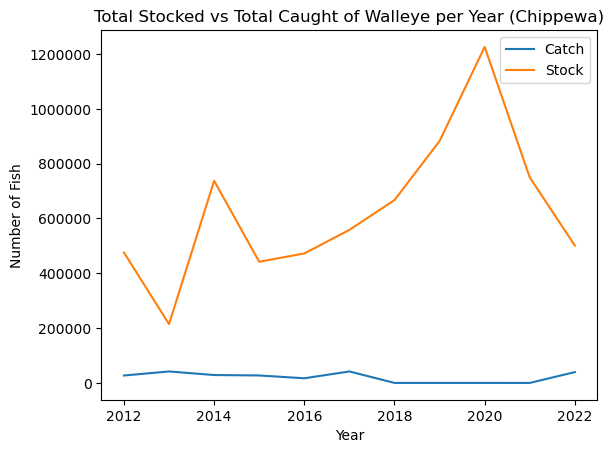

In [79]:
wal_total1.plot.line()
plt.xlabel('Year')
plt.ylabel('Number of Fish')
plt.title('Total Stocked vs Total Caught of Walleye per Year (Chippewa)')
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])
plt.savefig('WCC1.png')
plt.show()